In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data_csv =  sorted(str(p) for p in pathlib.Path("C:/Users/opolezh/Desktop/Paris Saclay/These/2_SCRIPT/exp_pf/data_all").glob("*.csv"))
print(len(data_csv))
data_csv

3


['C:\\Users\\opolezh\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_pf\\data_all\\subj_0.csv',
 'C:\\Users\\opolezh\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_pf\\data_all\\subj_1.csv',
 'C:\\Users\\opolezh\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_pf\\data_all\\subj_2.csv']

In [3]:
# data_l = []
def data_list (data_csv):
    data_l = []
    for elem in data_csv:
        data = pd.read_csv(elem, header=0, sep=';')
        data_l.append(data)
    return data_l

In [4]:
# def normalize_slope_values(data_list):
#     for data in data_list:
#         min_slope = min(data['slope'])
#         max_slope = max(data['slope'])
#         data['slope'] = -1 + 2 * (data['slope'] - min_slope) / (max_slope - min_slope)
#     return data_list

In [5]:
data_l=  data_list(data_csv)

In [6]:
data_l[2]

,num_trial,noise_lvl,slope,sd,mean,response,RT,acc,prop_left
0,0,0.0,10.0,0.000,10.000,1,292,1,0
1,1,0.0,8.0,0.000,8.000,1,254,1,0
2,2,0.0,6.0,0.000,6.000,1,94,1,0
3,3,0.0,4.0,0.000,4.000,1,302,1,0
4,4,0.0,2.0,0.000,2.000,1,192,1,0
...,...,...,...,...,...,...,...,...,...
195,45,4.5,1.5,3.538,1.655,-1,68,0,1
196,46,4.5,2.0,3.538,2.155,1,90,1,0
197,47,4.5,2.0,3.538,2.155,1,133,1,0
198,48,4.5,1.5,3.538,1.655,1,232,1,0


In [7]:
data_grouped = []
def group_data(data_list):
#     data_grouped = []
    for elem in data_list:
        grouped= elem.groupby(['noise_lvl', 'slope'])['prop_left','acc'].mean().reset_index()
        data_grouped.append(grouped)
    return data_grouped     

In [8]:
data_gr = group_data(data_l)

In [9]:
pd.set_option('display.max_rows', None)  # or 1000

In [10]:
data_gr[0]

,noise_lvl,slope,prop_left,acc
0,0.0,-10.0,1.000000,1.000000
1,0.0,-8.0,1.000000,1.000000
2,0.0,-6.0,1.000000,1.000000
3,0.0,-4.0,1.000000,1.000000
4,0.0,-2.0,1.000000,1.000000
5,0.0,-1.0,1.000000,1.000000
6,0.0,-0.5,1.000000,1.000000
7,0.0,0.0,0.500000,0.000000
8,0.0,0.5,0.000000,1.000000
9,0.0,1.0,0.000000,1.000000


In [11]:
def plot_simple_curve(data_list):
    for elem in range(len(data_list)):
        data= data_list[elem]
        # group by (noise_lvl) and distance from center (slope)
        grouped = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped['noise_lvl'].unique()
        fig =plt.figure(figsize=(7, 5))
        for noise in unique_noise_levels:
            subset = grouped[grouped['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']
            plt.plot(slope_values, prop_left_values, marker='o', label=f'Noise lvl {noise}')
#             plt.scatter(slope_values, prop_left_values, label=f'Noise lvl {noise}', marker='o', s=30)
        plt.xlabel(' Distance from center')
        plt.ylabel('Proportion of "left" responses')
        plt.title(f'Psychometric Curve subj {elem}')
        plt.legend(title='Noise lvl')
        plt.grid(True)

        # plt.scatter(data['slope'], data['prop_left'], color='b', label='real', marker='x', s=30)
        plt.xticks(range(-10, 11, 1))
        plt.yticks(np.arange(0, 1, 0.1))

        plt.legend()
        plt.show()

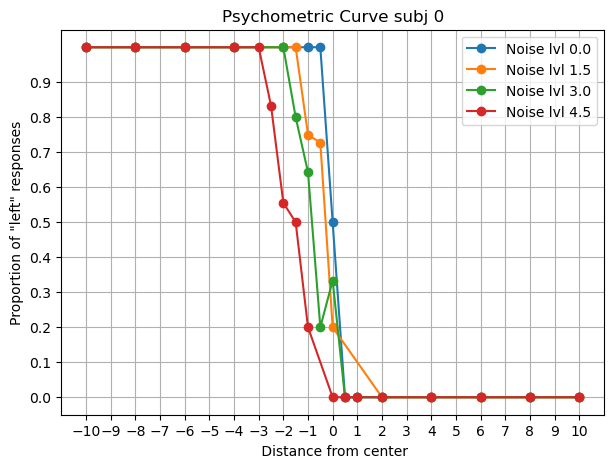

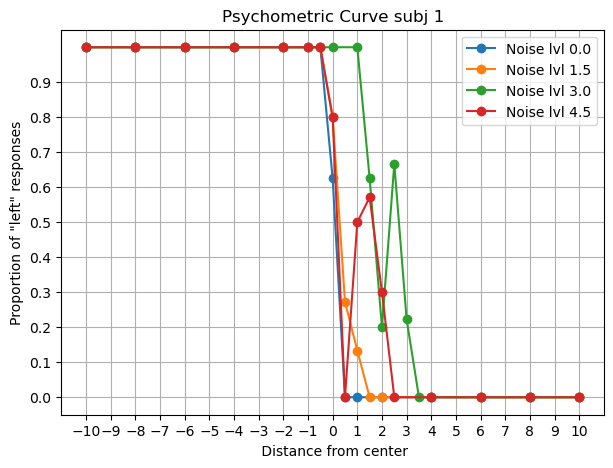

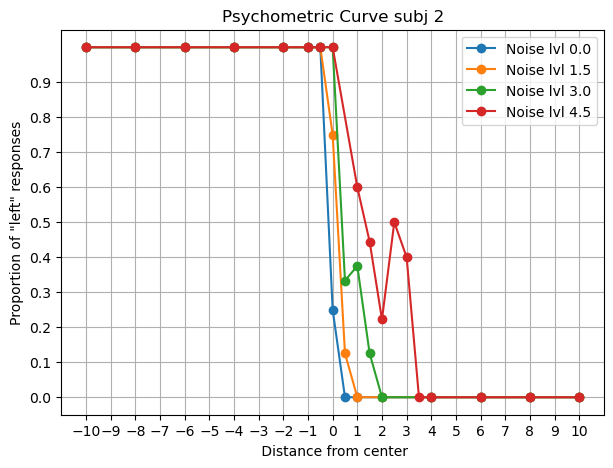

In [12]:
plot_simple_curve(data_l)

In [13]:

def plot_staircase(data_list):
    for elem in range(len(data_list)):
        data= data_list[elem]
            
        unique_noise_levels = data['noise_lvl'].unique()
        fig, axes = plt.subplots(1, 4, figsize=(17, 4))  # Adjust the figsize as needed
        plt.suptitle(f"S {elem}",fontsize=15)
        data_grouped = data.groupby('noise_lvl')
        # Define a threshold value for distinguishing the two sets of data
        threshold = 25
        for i, (noise, group) in enumerate(data_grouped):
            slope_values = group['slope']
            prop_left_values = group['prop_left']
            # Separate the data into two sets based on the threshold
            slope_values_start = slope_values.iloc[:threshold]
            slope_values_other = slope_values.iloc[threshold:] 
            # Select the appropriate subplot
            ax = axes[i]
            ax.plot(slope_values_start, 'o-', color='k',   linewidth=1.5, markersize=4, )
            ax.plot(slope_values_other, 'o-', color='k',   linewidth=1.5, markersize=4, )
            ax.axhline(y=0, color='k', linestyle='--')
            ax.set_title(f'Staircase for Noise lvl {noise}', fontsize=14)
            ax.set_xlabel('Trial', fontsize=15)
            ax.set_ylabel('Slope', fontsize=15)
            ax.grid(True, linestyle='--', alpha=0.6)        
    # Adjust the spacing between subplots
        plt.tight_layout()
        # Display the plot
        plt.show()

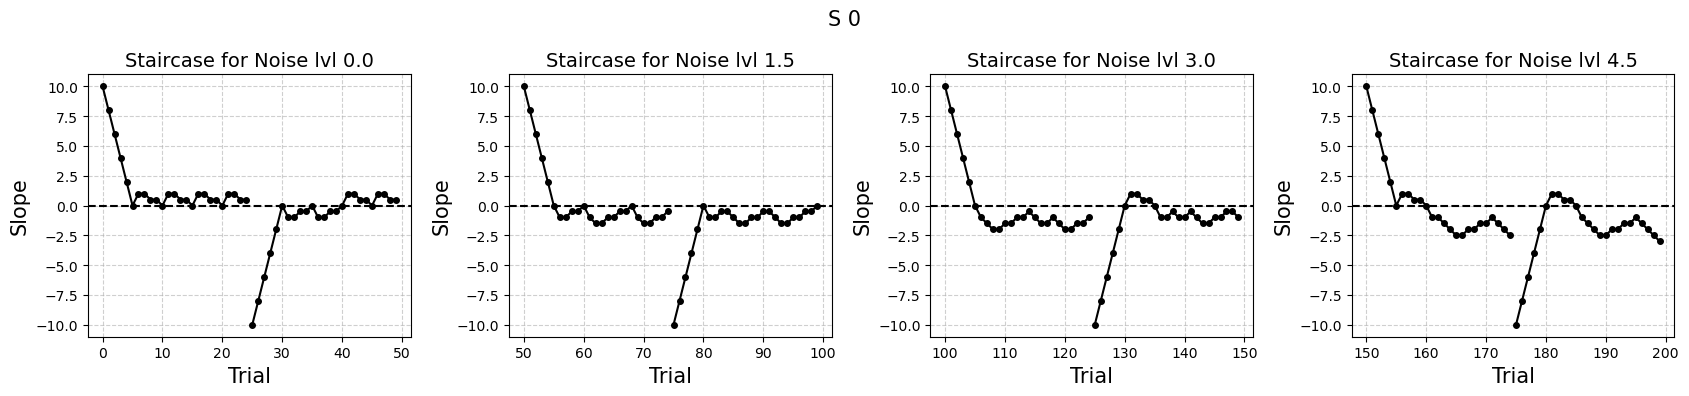

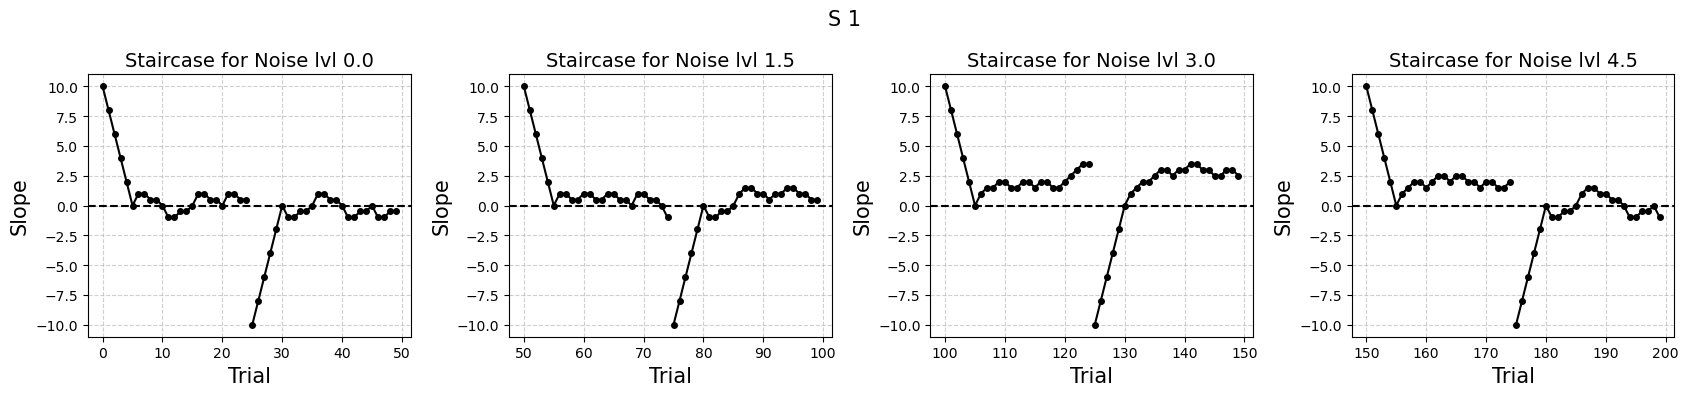

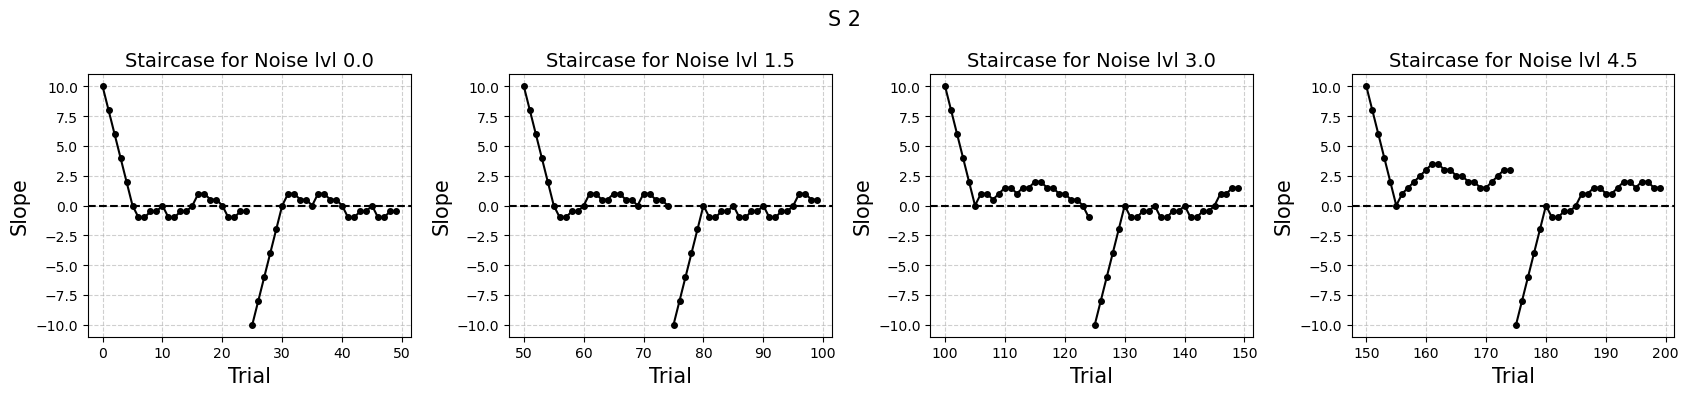

In [14]:
plot_staircase(data_l)

In [16]:
for elem, data in enumerate(data_l):
#         grouped_data= data
    grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
    unique_noise_levels = grouped_data['noise_lvl'].unique()
    print(grouped_data)
    for i, noise in enumerate(unique_noise_levels):
        subset = grouped_data[grouped_data['noise_lvl'] == noise]
        slope_values = subset['slope']
        prop_left_values = subset['prop_left']
#         print(subset)

    noise_lvl  slope  prop_left
0         0.0  -10.0   1.000000
1         0.0   -8.0   1.000000
2         0.0   -6.0   1.000000
3         0.0   -4.0   1.000000
4         0.0   -2.0   1.000000
5         0.0   -1.0   1.000000
6         0.0   -0.5   1.000000
7         0.0    0.0   0.500000
8         0.0    0.5   0.000000
9         0.0    1.0   0.000000
10        0.0    2.0   0.000000
11        0.0    4.0   0.000000
12        0.0    6.0   0.000000
13        0.0    8.0   0.000000
14        0.0   10.0   0.000000
15        1.5  -10.0   1.000000
16        1.5   -8.0   1.000000
17        1.5   -6.0   1.000000
18        1.5   -4.0   1.000000
19        1.5   -2.0   1.000000
20        1.5   -1.5   1.000000
21        1.5   -1.0   0.750000
22        1.5   -0.5   0.727273
23        1.5    0.0   0.200000
24        1.5    2.0   0.000000
25        1.5    4.0   0.000000
26        1.5    6.0   0.000000
27        1.5    8.0   0.000000
28        1.5   10.0   0.000000
29        3.0  -10.0   1.000000
30      

In [19]:
# Function to calculate performance metrics (mean reaction time and accuracy)
def calculate_performance_metrics(data, noise, slope_values):
    reaction_times = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['RT']
    accuracy = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['acc']
    prop_left = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['prop_left']
    mean_reaction_time = np.mean(reaction_times)
    mean_accuracy = np.mean(accuracy)
    mean_prop_left = np.mean(prop_left)
    return mean_reaction_time, mean_accuracy, mean_prop_left

In [20]:
# Generate results table
def generate_results_table(data_list):
    results = []
    for elem, data in enumerate(data_list):
#         grouped_data=  data
        grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        for i, noise in enumerate(unique_noise_levels):
            subset = grouped_data[grouped_data['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']

            threshold, slope, lapse = fit_sigmoid_function(slope_values, prop_left_values)
            mean_reaction_time, mean_accuracy, mean_prop_left = calculate_performance_metrics(data, noise, slope_values)
                        # Calculate R-squared value
            residuals = prop_left_values - sigmoid(slope_values, threshold, slope, lapse)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((prop_left_values - np.mean(prop_left_values))**2)
            r_squared = 1 - (ss_res / ss_tot)
            slope_at_threshold = (sigmoid(threshold, threshold, slope, lapse) - sigmoid(threshold - 0.01, threshold, slope, lapse)) / 0.01
            result = {
                'Subject': elem,
                'Noise_Level': noise,
                'Threshold': threshold,
                'Slope': slope,
                'Lapse_Rate': lapse,
                'slope_at_threshold' : slope_at_threshold,
                'r_squared' :r_squared,
                'Mean_Reaction_Time': mean_reaction_time,
                'Mean_Accuracy': mean_accuracy,
            }
            results.append(result)
    
    summary_df = pd.DataFrame(results)
    return summary_df

# Plot psychometric curves
def plot_psychometric_curves(data_list, summary_df):
    markers = ['o', 's', 'D', '^', 'v']   
    for elem, data in enumerate(data_list):
        grouped_data= data
#         grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        fig, ax = plt.subplots(figsize=(5, 4))
        plt.title(f'Psychometric Curves for Subject {elem + 1}')

        for i, noise in enumerate(unique_noise_levels):
            subset = grouped_data[grouped_data['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']

            threshold, slope, lapse = fit_sigmoid_function(slope_values, prop_left_values)

            x_values = np.linspace(min(slope_values), max(slope_values), 100)
            y_values = sigmoid(x_values, threshold, slope, lapse)

            color = plt.cm.viridis(i / len(unique_noise_levels))
            marker = markers[i % len(markers)]
            label = f'Noise {noise}'
            ax.plot(x_values, y_values, label=label, color=color, marker=marker, markersize=6)

        plt.ylim(-0.01, 1.01)
        plt.xlabel('Distance from center')
        plt.ylabel('Proportion of "left" responses')
        plt.axvline(x=0, color='gray', linestyle='-.', alpha=0.1)
        plt.axhline(y=0.5, color='gray', linestyle='-.', alpha=0.5)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.show()


In [24]:
# Plot psychometric curves
def plot_psychometric_curves_2(data_list, summary_df):
    markers = ['o', 's', 'D', '^', 'v']   
    for elem, data in enumerate(data_list):
        grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        fig, axes = plt.subplots(1, 4, figsize=(20, 5))

        plt.suptitle(f"Psychometric Curves for Subject {elem+1}",fontsize=15)
        for i, noise in enumerate(unique_noise_levels):
            ax = axes[i]
            subset = grouped_data[grouped_data['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']

            threshold, slope, lapse = fit_sigmoid_function(slope_values, prop_left_values)

            x_values = np.linspace(min(slope_values), max(slope_values), 100)
            y_values = sigmoid(x_values, threshold, slope, lapse)
            
            slope_at_threshold = (sigmoid(threshold, threshold, slope, lapse) - sigmoid(threshold - 0.01, threshold, slope, lapse)) / 0.01
            x_slope_line = np.linspace(min(slope_values), max(slope_values), 100)
            y_slope_line = [sigmoid(x, threshold, slope, lapse) + slope_at_threshold * (x - threshold) for x in x_slope_line]
            ax.plot(x_slope_line, y_slope_line, color='k', linestyle='-', label='Slope Line')
            
#             ax.set_xlim(0, 1)
            ax.set_ylim(-0.01, 1.01)
            ax.set_xticks(np.arange(- 10, 10, 2))
            ax.set_yticks(np.arange(0, 1.1, 0.1))
            
#             # Adjust the x-axis and y-axis limits to [0, 1]
#             ax.set_xlim(0, 1)
#             ax.set_ylim(0, 1)
            
            color = plt.cm.viridis(i / len(unique_noise_levels))
            marker = markers[i % len(markers)]
            label = f'Noise {noise}'
            ax.plot(x_values, y_values, label=label, color=color, marker=marker, markersize=6)
            ax.plot(slope_values, prop_left_values, 'o', label='Data', color='k')

            ax.set_xlabel('Distance from center')
            ax.set_ylabel('Proportion of "left" responses')
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.6)

In [17]:
from lmfit import Model
def sigmoid(x, threshold, slope, lapse):
    return lapse + (1 - 2 * lapse) / (1 + np.exp(-slope * (x - threshold)))
def fit_sigmoid_function(slope_values, prop_left_values):
    model = Model(sigmoid)
    params = model.make_params(threshold=0, slope=1, lapse=0.01)
    
    try:
#         result = model.fit(prop_left_values, x=slope_values, params=params, method='nelder')
#         result = model.fit(prop_left_values, params, x=slope_values, method='powell')
        result = model.fit(prop_left_values, params, x=slope_values, method='bfgs')
    except Exception as e:
        print(f"Optimization failed: {e}")
        return np.nan, np.nan, np.nan
    
    threshold = result.best_values['threshold']
    slope = result.best_values['slope']
    lapse = result.best_values['lapse']
    
    return threshold, slope, lapse


In [21]:
data_l = data_list(data_csv)
summary_df = generate_results_table(data_l)
summary_df

,Subject,Noise_Level,Threshold,Slope,Lapse_Rate,slope_at_threshold,r_squared,Mean_Reaction_Time,Mean_Accuracy
0,0,0.0,-1.464119e-08,22.178243,1.000002,-5.521965,1.000000,266.50,0.84
1,0,1.5,-3.378871e-01,3.074378,0.998644,-0.766450,0.988471,451.60,0.76
2,0,3.0,-8.056094e-01,2.151021,1.003904,-0.541934,0.979800,400.10,0.72
3,0,4.5,-1.675597e+00,1.888797,1.008326,-0.480048,0.993198,352.18,0.66
4,1,0.0,2.305422e-02,22.157337,1.000002,-5.516810,1.000000,270.82,0.84
5,1,1.5,3.070189e-01,4.306940,0.998541,-1.073426,0.997381,229.66,0.80
6,1,3.0,2.047402e+00,1.434372,1.014162,-0.368743,0.918735,313.86,0.66
7,1,4.5,7.686317e-01,1.090038,1.017305,-0.281938,0.853390,302.30,0.72
8,2,0.0,-4.939650e-02,22.240411,1.000003,-5.537335,1.000000,203.14,0.84
9,2,1.5,1.805793e-01,6.132229,1.001457,-1.537043,0.999928,235.38,0.82


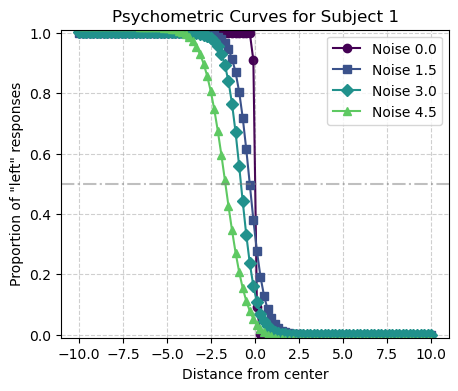

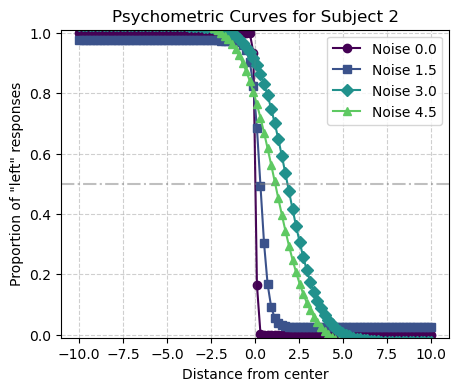

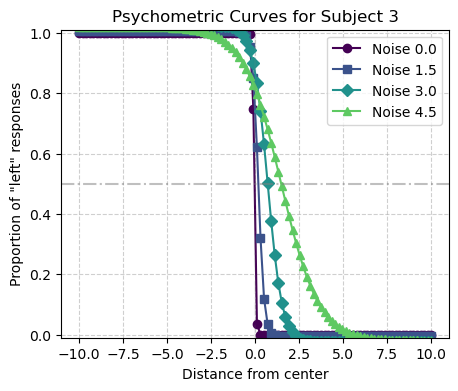

In [22]:
plot_psychometric_curves(data_l, summary_df)

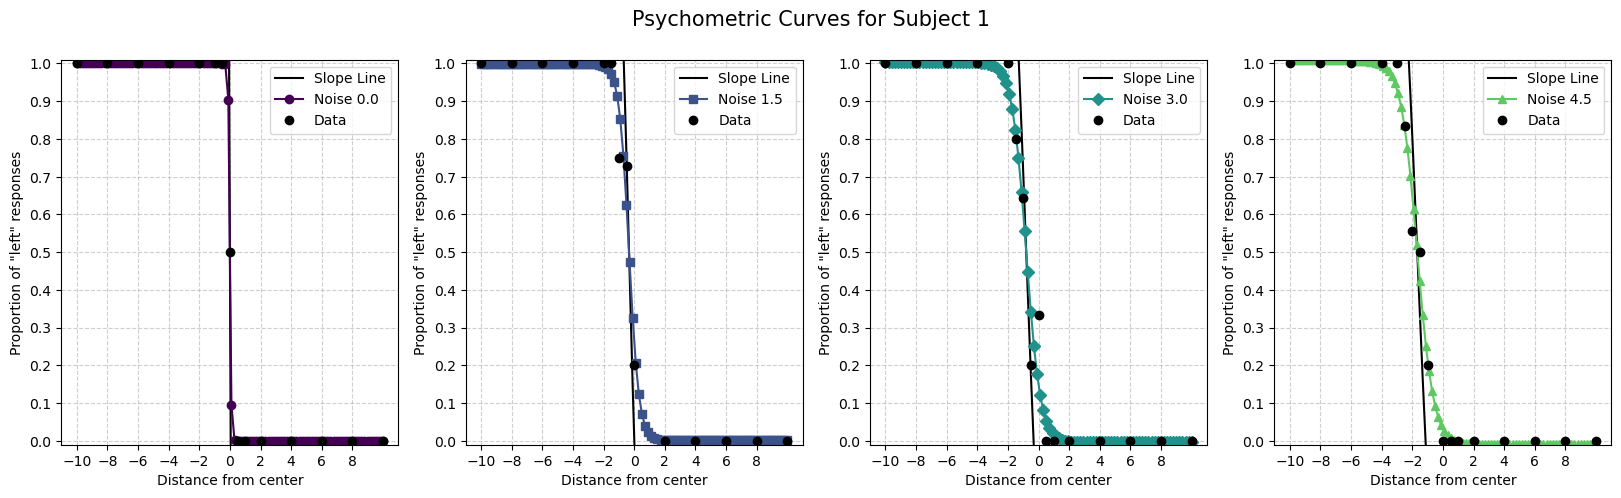

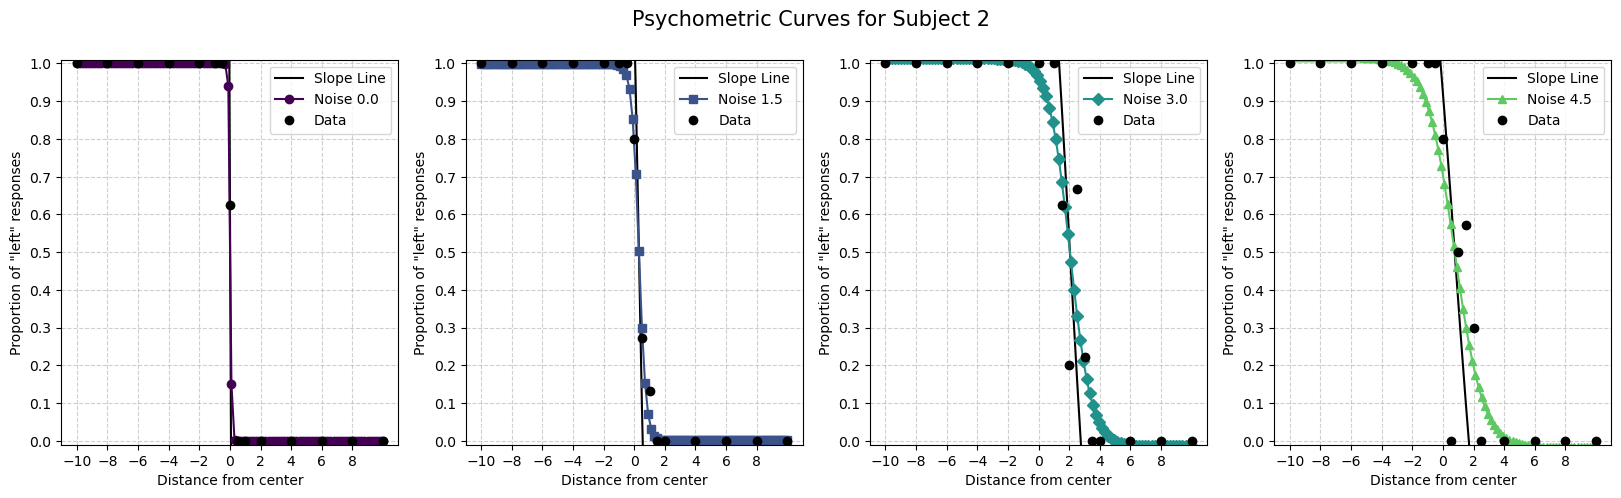

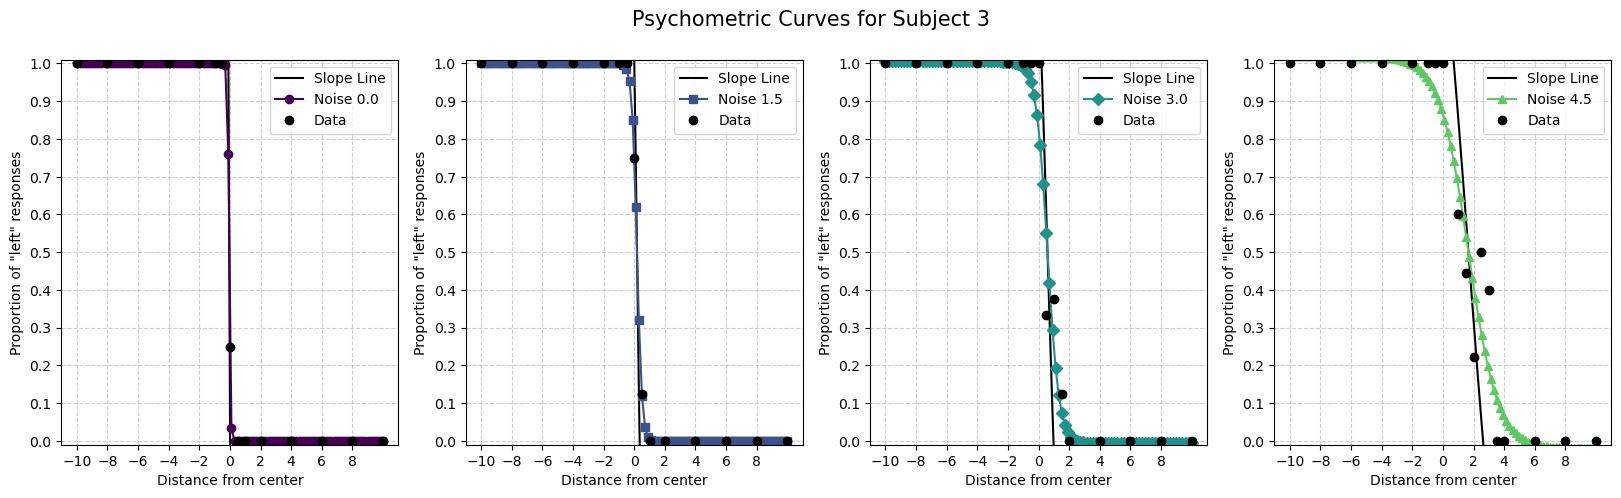

In [25]:
plot_psychometric_curves_2(data_l, summary_df)

## With P = 1 / (1 + np.exp((-slope * (x - threshold))))

In [26]:

def sigmoid(x, slope, threshold):
    return 1 / (1 + np.exp((slope * (x - threshold))))

# Function to fit the sigmoid function using lmfit
def fit_sigmoid_function(slope_values, prop_left_values):
    model = Model(sigmoid)
    params = model.make_params(slope=1, threshold=0)
    result = model.fit(prop_left_values, params, x=slope_values, method='bfgs')

#     result = model.fit(prop_left_values, params, x=slope_values, method='nelder')
#     result = model.fit(prop_left_values, params, x=slope_values, method='powell')

#     result = model.fit(prop_left_values, params, x=slope_values)
    return result.best_values['slope'], result.best_values['threshold']

# Function to calculate performance metrics (mean reaction time and accuracy)
def calculate_performance_metrics(data, noise, slope_values):
    reaction_times = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['RT']
    accuracy = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['acc']
    prop_left = data[(data['noise_lvl'] == noise) & (data['slope'].isin(slope_values))]['prop_left']
    mean_reaction_time = np.mean(reaction_times)
    mean_accuracy = np.mean(accuracy)
    mean_prop_left = np.mean(prop_left)
    return mean_reaction_time, mean_accuracy, mean_prop_left

# Generate results table
def generate_results_table(data_list):
    results = []
    for elem, data in enumerate(data_list):
        grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        for i, noise in enumerate(unique_noise_levels):
            subset = grouped_data[grouped_data['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']

            slope, threshold = fit_sigmoid_function(slope_values, prop_left_values)
            mean_reaction_time, mean_accuracy, mean_prop_left = calculate_performance_metrics(data, noise, slope_values)

            # Calculate R-squared value
            residuals = prop_left_values - sigmoid(slope_values, slope, threshold)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((prop_left_values - np.mean(prop_left_values))**2)
            r_squared = 1 - (ss_res / ss_tot)
            slope_at_threshold = (sigmoid(threshold,  slope, threshold,) - sigmoid(threshold - 0.01, slope, threshold)) / 0.01
            result = {
                'Subject': elem,
                'Noise_Level': noise,
                'Threshold': threshold,
                'Slope': slope,
                'slope_at_threshold': slope_at_threshold,
                'r_squared': r_squared,
                'Mean_Reaction_Time': mean_reaction_time,
                'Mean_Accuracy': mean_accuracy,
            }
            results.append(result)

    summary_df = pd.DataFrame(results)
    return summary_df

# Plot psychometric curves
def plot_psychometric_curves(data_list, summary_df):
    markers = ['o', 's', 'D', '^', 'v']
    for elem, data in enumerate(data_list):
        grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        fig, ax = plt.subplots(figsize=(5, 4))
        plt.title(f'Psychometric Curves for Subject {elem + 1}')

        for i, noise in enumerate(unique_noise_levels):
            subset = grouped_data[grouped_data['noise_lvl'] == noise]
            slope_values = subset['slope']
            prop_left_values = subset['prop_left']

            slope, threshold = fit_sigmoid_function(slope_values, prop_left_values)
            x_values = np.linspace(min(slope_values), max(slope_values), 100)
            y_values = sigmoid(x_values, slope, threshold)

            color = plt.cm.viridis(i / len(unique_noise_levels))
            marker = markers[i % len(markers)]
            label = f'Noise {noise}'
            ax.plot(x_values, y_values, label=label, color=color, marker=marker, markersize=6)

        plt.ylim(-0.01, 1.01)
        plt.xlabel('Distance from center')
        plt.ylabel('Proportion of "left" responses')
        plt.axvline(x=0, color='gray', linestyle='-.', alpha=0.1)
        plt.axhline(y=0.5, color='gray', linestyle='-.', alpha=0.5)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.show()


In [27]:
data_l = data_list(data_csv)
summary_df = generate_results_table(data_l)
summary_df

,Subject,Noise_Level,Threshold,Slope,slope_at_threshold,r_squared,Mean_Reaction_Time,Mean_Accuracy
0,0,0.0,-2.483103e-07,18.003589,-4.488779,1.000000,266.50,0.84
1,0,1.5,-3.383857e-01,3.053026,-0.763197,0.988465,451.60,0.76
2,0,3.0,-8.068311e-01,2.184605,-0.546129,0.979754,400.10,0.72
3,0,4.5,-1.675956e+00,1.942122,-0.485515,0.992973,352.18,0.66
4,1,0.0,2.064540e-02,24.742443,-6.154246,1.000000,270.82,0.84
5,1,1.5,3.072310e-01,4.275258,-1.068652,0.997374,229.66,0.80
6,1,3.0,2.043747e+00,1.488612,-0.372146,0.918171,313.86,0.66
7,1,4.5,7.602008e-01,1.141513,-0.285375,0.852663,302.30,0.72
8,2,0.0,-6.069336e-02,18.101033,-4.512943,1.000000,203.14,0.84
9,2,1.5,1.803410e-01,6.167515,-1.541390,0.999920,235.38,0.82


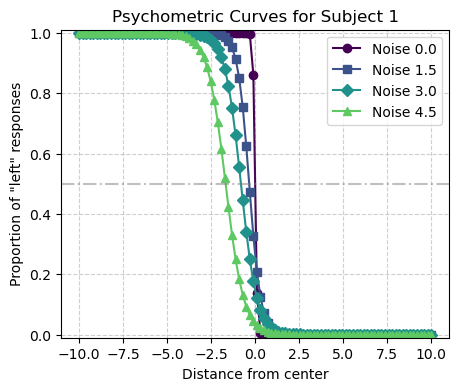

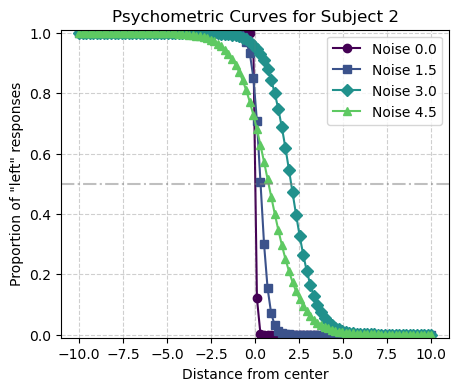

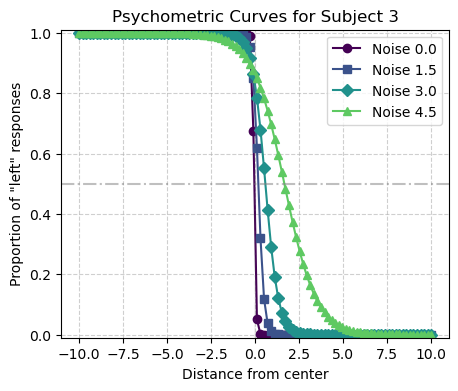

In [28]:

plot_psychometric_curves(data_l, summary_df)

### Without data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()

In [40]:
def sigmoid(x, threshold, slope, lapse):
    return lapse + (1 - 2 * lapse) / (1 + np.exp(-slope * (x - threshold)))
def fit_psychometric_function(data):
    model = Model(sigmoid)
    x_data = data['slope']
    y_data = data['prop_left']
    params = model.make_params(threshold=0, slope=1, lapse=0)
    try:
#         result = model.fit(prop_left_values, x=slope_values, params=params, method='nelder')
#         result = model.fit(prop_left_values, params, x=slope_values, method='powell')
        result = model.fit(y_data, params, x=x_data, method='bfgs')
    except Exception as e:
        print(f"Optimization failed: {e}")
        return np.nan, np.nan, np.nan
    
    threshold = result.best_values['threshold']
    slope = result.best_values['slope']
    lapse = result.best_values['lapse']
    
    return threshold, slope, lapse
def generate_results_table(data_list):
    results = []
    for elem, data in enumerate(data_list):
#         grouped_data=  data
        grouped_data = data.groupby('noise_lvl')
#         grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()
#         for i, noise in enumerate(unique_noise_levels):
        for noise_lvl, data_group in grouped_data:
            threshold, slope,lapse = fit_psychometric_function(data_group)    

            mean_reaction_time, mean_accuracy, mean_prop_left = calculate_performance_metrics(data, noise, slope_values)
                        # Calculate R-squared value
            residuals = prop_left_values - sigmoid(slope_values, threshold, slope, lapse)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((prop_left_values - np.mean(prop_left_values))**2)
            r_squared = 1 - (ss_res / ss_tot)
            slope_at_threshold = (sigmoid(threshold, threshold, slope, lapse) - sigmoid(threshold - 0.01, threshold, slope, lapse)) / 0.01
            result = {
                'Subject': elem,
                'Noise_Level': noise,
                'Threshold': threshold,
                'Slope': slope,
                'Lapse_Rate': lapse,
                'slope_at_threshold' : slope_at_threshold,
                'r_squared' :r_squared,
                'Mean_Reaction_Time': mean_reaction_time,
                'Mean_Accuracy': mean_accuracy,
            }
            results.append(result)
    
    summary_df = pd.DataFrame(results)
    return summary_df
# Plot psychometric curves
def plot_psychometric_curves(data_list, summary_df):
    markers = ['o', 's', 'D', '^', 'v']   
    for elem, data in enumerate(data_list):
        grouped_data = data.groupby('noise_lvl')
#         grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()

        fig, ax = plt.subplots(figsize=(5, 4))
        plt.title(f'Psychometric Curves for Subject {elem + 1}')
#         for i, noise in enumerate(unique_noise_levels):
#             subset = grouped_data[grouped_data['noise_lvl'] == noise]
#             slope_values = subset['slope']
#             prop_left_values = subset['prop_left']
        for noise_lvl, data_group in grouped_data :
            threshold, slope,lapse = fit_psychometric_function(data_group)    

            x_values = np.linspace(min(slope_values), max(slope_values), 100)
            y_values = sigmoid(x_values, threshold, slope, lapse)

            color = plt.cm.viridis(i / len(unique_noise_levels))
            marker = markers[i % len(markers)]
            label = f'Noise {noise_lvl}'
            ax.plot(x_values, y_values, label=label, marker = 'o',markersize=3)

        plt.ylim(-0.01, 1.01)
        plt.xticks(range(-10, 11, 1))
        plt.yticks(np.arange(0, 1, 0.1))
        plt.xlabel('Distance from center')
        plt.ylabel('Proportion of "left" responses')
        plt.axvline(x=0, color='gray', linestyle='-.', alpha=0.1)
        plt.axhline(y=0.5, color='gray', linestyle='-.', alpha=0.5)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.show()

In [41]:
summary_df = generate_results_table(data_l)
summary_df

,Subject,Noise_Level,Threshold,Slope,Lapse_Rate,slope_at_threshold,r_squared,Mean_Reaction_Time,Mean_Accuracy
0,0,4.5,-0.000008,21.442254,1.000013,-5.340253,0.613082,312.129032,0.612903
1,0,4.5,-0.307713,2.353214,1.000180,-0.588488,0.516631,312.129032,0.612903
2,0,4.5,-0.807172,2.323869,1.001281,-0.582430,0.279532,312.129032,0.612903
3,0,4.5,-1.689735,1.623204,1.021035,-0.422864,-0.075007,312.129032,0.612903
4,1,4.5,0.024432,20.907116,1.000012,-5.207953,0.646497,303.750000,0.708333
5,1,4.5,0.295332,4.221263,0.974351,-1.001032,0.718997,303.750000,0.708333
6,1,4.5,1.833583,1.113424,1.025828,-0.292732,0.938930,303.750000,0.708333
7,1,4.5,1.137979,1.005570,1.049105,-0.276079,0.910908,303.750000,0.708333
8,2,4.5,-0.050133,21.913396,1.000013,-5.456676,0.517664,295.620000,0.680000
9,2,4.5,0.181146,6.046400,1.005040,-1.526372,0.666534,295.620000,0.680000


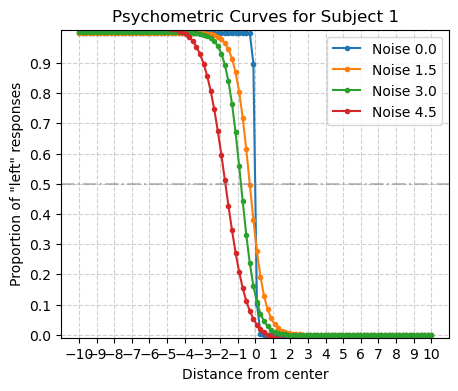

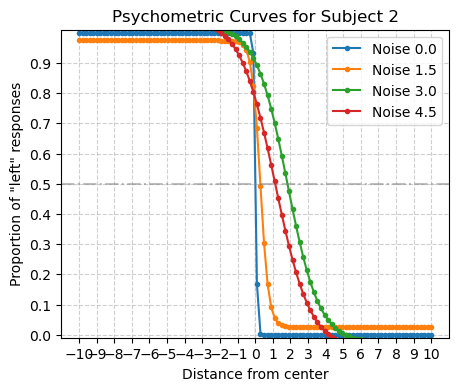

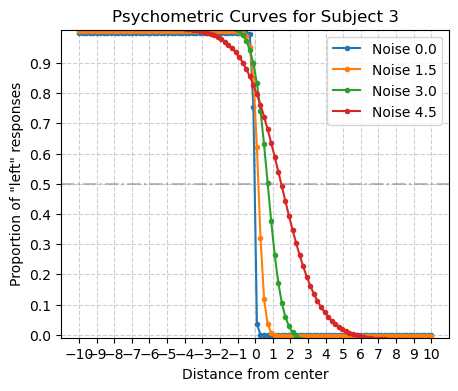

In [42]:
plot_psychometric_curves(data_l, summary_df)

In [43]:
def sigmoid(x,  threshold,slope,):
    return 1 / (1 + np.exp((slope * (x - threshold))))

def fit_psychometric_function(data):
    model = Model(sigmoid)
    x_data = data['slope']
    y_data = data['prop_left']
    params = model.make_params(threshold=0, slope=1, )
    try:
#         result = model.fit(prop_left_values, x=slope_values, params=params, method='nelder')
#         result = model.fit(prop_left_values, params, x=slope_values, method='powell')
        result = model.fit(y_data, params, x=x_data, method='bfgs')
    except Exception as e:
        print(f"Optimization failed: {e}")
        return np.nan, np.nan, np.nan
    
    threshold = result.best_values['threshold']
    slope = result.best_values['slope']

    return threshold, slope, 

In [44]:
def generate_results_table(data_list):
    results = []
    for elem, data in enumerate(data_list):
#         grouped_data=  data
        grouped_data = data.groupby('noise_lvl')
#         grouped_data = data.groupby(['noise_lvl', 'slope'])['prop_left'].mean().reset_index()
        unique_noise_levels = grouped_data['noise_lvl'].unique()
#         for i, noise in enumerate(unique_noise_levels):
        for noise_lvl, data_group in grouped_data:
            threshold,slope = fit_psychometric_function(data_group)    

            mean_reaction_time, mean_accuracy, mean_prop_left = calculate_performance_metrics(data, noise, slope_values)
                        # Calculate R-squared value
            residuals = prop_left_values - sigmoid(slope_values, threshold, slope, )
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((prop_left_values - np.mean(prop_left_values))**2)
            r_squared = 1 - (ss_res / ss_tot)
            slope_at_threshold = (sigmoid(threshold, threshold, slope, ) - sigmoid(threshold - 0.01, threshold, slope,)) / 0.01
            result = {
                'Subject': elem,
                'Noise_Level': noise,
                'Threshold': threshold,
                'Slope': slope,
                
                'slope_at_threshold' : slope_at_threshold,
                'r_squared' :r_squared,
                'Mean_Reaction_Time': mean_reaction_time,
                'Mean_Accuracy': mean_accuracy,
            }
            results.append(result)
    
    summary_df = pd.DataFrame(results)
    return summary_df

In [45]:
summary_df = generate_results_table(data_l)
summary_df

,Subject,Noise_Level,Threshold,Slope,slope_at_threshold,r_squared,Mean_Reaction_Time,Mean_Accuracy
0,0,4.5,-7.518622e-09,22.433657,-5.585011,0.613112,312.129032,0.612903
1,0,4.5,-3.076985e-01,2.354734,-0.588656,0.516811,312.129032,0.612903
2,0,4.5,-8.074979e-01,2.335550,-0.583861,0.280708,312.129032,0.612903
3,0,4.5,-1.691199e+00,1.724288,-0.431061,-0.041742,312.129032,0.612903
4,1,4.5,2.330611e-02,21.916161,-5.457214,0.646511,303.750000,0.708333
5,1,4.5,2.957771e-01,3.663039,-0.915657,0.696989,303.750000,0.708333
6,1,4.5,1.828087e+00,1.185298,-0.296321,0.938368,303.750000,0.708333
7,1,4.5,1.144177e+00,1.123024,-0.280753,0.916271,303.750000,0.708333
8,2,4.5,-5.086310e-02,21.599385,-5.378950,0.517682,295.620000,0.680000
9,2,4.5,1.803410e-01,6.167516,-1.541390,0.673081,295.620000,0.680000
